# Author: Arpit Khare
## Organisation: The Sparks Foundation
# Data Science and Business Analytics Internship
## Task 2: Predict the optimum number of clusters and represent it visually from Iris Dataset
## Dataset: https://bit.ly/3kXTdox

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Importing Dataset and Visualising Data

In [2]:
df = pd.read_csv('Iris.csv')

In [29]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>

In [30]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [32]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## We have these 3 Species of Iris  of which spetial (length, width) and petal (length, width) are given. We need to find the clusters of these 3 species 

# Finding if Missing Values are Present

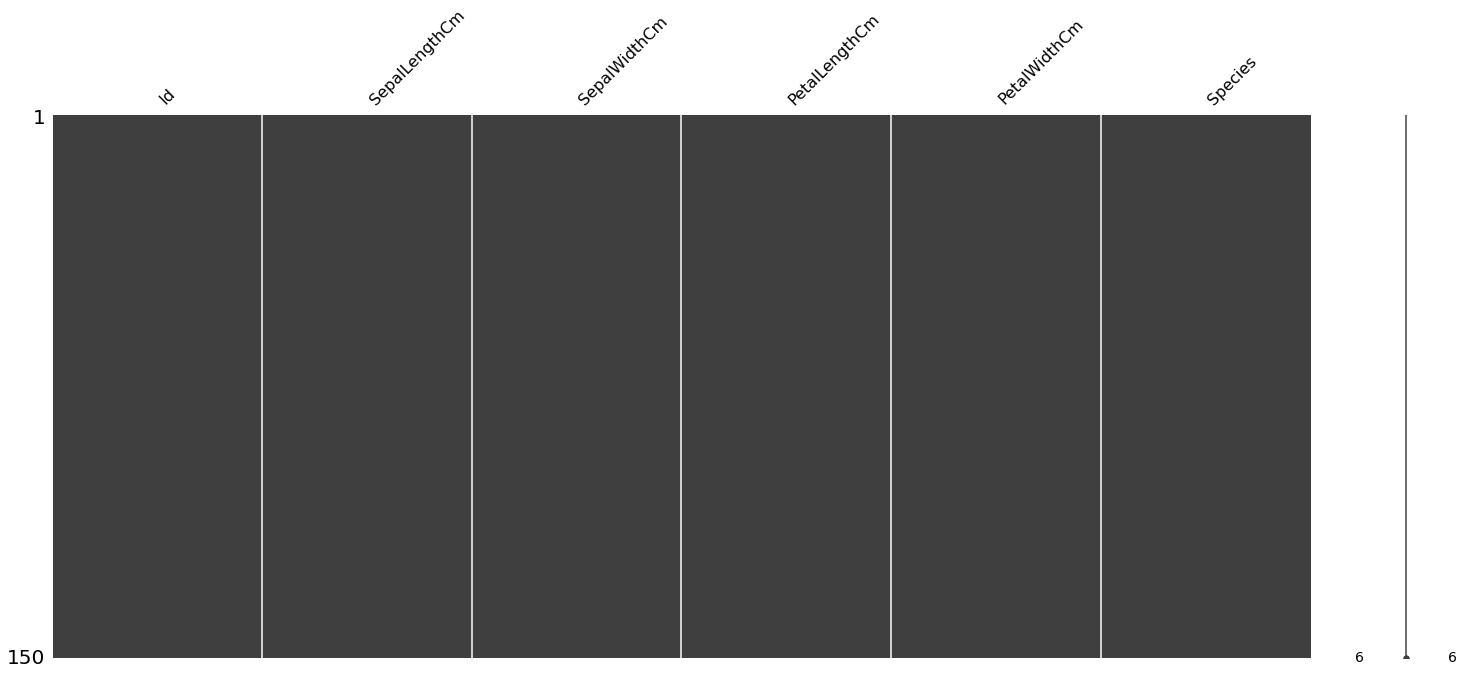

In [33]:
import missingno as ms
ms.matrix(df)

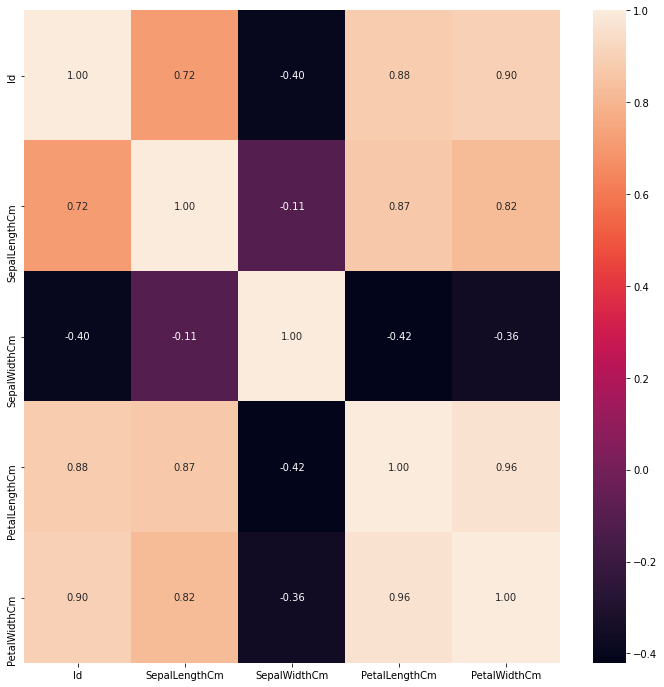

In [34]:
fig, ax = plt.subplots(figsize=[12,12])
sb.heatmap(df.corr(),fmt=".2f",annot=True)

In [43]:
dataframe = df.drop(columns = ['Species', 'Id'])
dataframe.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Finding optimanl Number of Clusture**
For finding the Optimal number of clusture we can use Silhoutee or Elbow method

# Elbow Method
Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow.

In [45]:
from sklearn.cluster import KMeans
sum_of_squared_distance = []
clusters_range = range(1,10)
for k in clusters_range:
  km = KMeans(n_clusters = k)
  km = km.fit(dataframe)
  sum_of_squared_distance.append(km.inertia_)

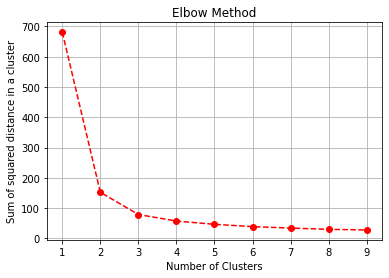

In [46]:
plt.plot(clusters_range, sum_of_squared_distance, 'go--', color = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance in a cluster')
plt.grid()
plt.show()

Here we can see that at 3 the values are getting towards constant so the appropriate number of clusters will be 3

# **Using K Means Algorithm**

In [47]:
from sklearn.cluster import KMeans
algo = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
pred = algo.fit_predict(dataframe) 

# Visualising Clusters through Graphs

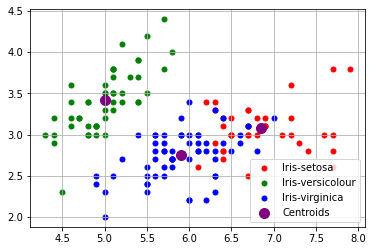

In [48]:
#plotting clusters
x = dataframe.iloc[:,[0,1,2,3]].values
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 25, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s = 25, c = 'blue', label = 'Iris-virginica')

#plotting centroids of clusters
plt.scatter(algo.cluster_centers_[:, 0], algo.cluster_centers_[:, 1], s = 100, c = 'purple', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()